<a href="https://colab.research.google.com/github/NhutTien0905/NhutTien0905/blob/main/mnist_2_hidden.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import mnist

In [2]:
(trainX,trainy), (testX,testy) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
trainX.shape

(60000, 28, 28)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random

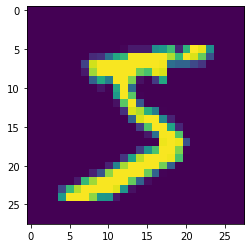

5


In [5]:
plt.imshow(trainX[0])
plt.show()
print(trainy[0])

In [6]:
def NumtoVec(n,maxLength = 10):
    vec = np.zeros(maxLength)
    vec[n] = 1
    vec.reshape(1,maxLength)
    return vec

In [7]:
subTrainX = []
subTrainy = []
trainPair = list(zip(trainX,trainy))
random.shuffle(trainPair)
nSample = 2000
for i in range(nSample):
    x, y = trainPair[i]
    x = x.flatten()
    x = x.reshape(1,len(x))
    subTrainX.append(x)
    y = NumtoVec(y)
    subTrainy.append(y)

In [8]:
class NeuralNetwork():
    def __init__(self,Xs,Ys,inputS,hiddenS1,hiddenS2,outputS):
        self.Xs = Xs
        self.Ys = Ys
        self.inputS = inputS
        self.hiddenS1 = hiddenS1
        self.hiddenS2 = hiddenS2
        self.outputS = outputS

    def generateWeight(self,inputt,outputt):
        return np.random.rand(outputt,inputt + 1).transpose() - 0.5

    def sigmoid(self,z):
        return 1/(1+np.exp(-z))

    def addBias(self,x):
        curLen = len(x.flatten())
        return np.concatenate(([1],x.flatten())).reshape(1,curLen+1)

    def forward(self,x,w1,w2,w3):
        a1 = x #(1,784)
        a1_bias = self.addBias(a1) #(1,785)
        z2 = np.matmul(a1_bias,w1) #(1,785)x(785,100)
        a2 = self.sigmoid(z2) #(1,100)
        a2_bias = self.addBias(a2) #(1,101)
        z3 = np.matmul(a2_bias,w2) #(1,101)x(101,100)
        a3 = self.sigmoid(z3) # (1,100)
        a3_bias = self.addBias(a3) #(1,101)
        z4 = np.matmul(a3_bias,w3) #(1,101)x(101,10)
        a4 = self.sigmoid(z4) #(1,10)
        return a1_bias,a2,a2_bias,a3,a3_bias,a4

    def backward(self,x,y,w1,w2,w3):
        a1_bias,a2,a2_bias,a3,a3_bias,a4 = self.forward(x,w1,w2,w3)

        d4 = a4 - y #(1,10)
        # (1,10)x(10,101) * (1,101)
        d3 = (np.matmul(d4,w3.transpose())) * (a3_bias*(1-a3_bias))
        # (1,100)x(100,101) * (1,101)
        d2 = (np.matmul(d3[:,1:],w2.transpose())) * (a2_bias*(1-a2_bias))

        delta1 = np.matmul(a1_bias.transpose(), d2) # (785,1)x(1,101)->(785,101)
        delta2 = np.matmul(a2_bias.transpose(), d3) # (101,1)x(1,101)->(101,101)
        delta3 = np.matmul(a3_bias.transpose(), d4) # (101,1)x(1,10)->(101,10)

        return delta1,delta2,delta3

    def mse(self,pred,y):
        return np.mean(np.power(pred - y,2))

    def train(self,epochs,w1,w2,w3,lr):
        acc = []
        losses = []
        for epoch in range(epochs):
            capDelta1 = 0
            capDelta2 = 0
            capDelta3 = 0
            correctCase = 0
            l = []
            for i in range(len(self.Xs)):
                x = self.Xs[i]
                y = self.Ys[i]
                a1_bias,a2,a2_bias,a3,a3_bias,pred = self.forward(x,w1,w2,w3)
                if pred.argmax() == y.argmax():
                    correctCase += 1
                l.append(self.mse(pred,y))
                delta1,delta2,delta3 = self.backward(x,y,w1,w2,w3)
                capDelta1 += delta1
                capDelta2 += delta2
                capDelta3 += delta3
            # (785,100)     (785,100)
            w1 = w1 - lr*capDelta1[:,1:]
            # (101,100)     (101,100)
            w2 = w2 - lr*capDelta2[:,1:]
            # (101,10)      (101,10)
            w3 = w3 - lr*capDelta3

            curAcc = correctCase*100/len(self.Xs)
            acc.append(curAcc)
            meanLoss = np.array(l).mean()
            losses.append(meanLoss)
            freq = 5
            if (epoch + 1) % freq == 0:
                avgAcc = np.array(acc[-5:]).mean()
                loss = np.array(losses[-5:]).mean()
                print(f"Epoch {epoch + 1}: AVG ACC during {freq} epochs: {avgAcc}")
                print(f"Epoch {epoch + 1}: Loss: {loss}")
        return acc,losses,w1,w2,w3

        

In [9]:
inputS = 784
hiddenS1 = 81
hiddenS2 = 81
outputS = 10


In [10]:
neural = NeuralNetwork(subTrainX,subTrainy,inputS,hiddenS1,hiddenS2,outputS)
w1 = neural.generateWeight(inputS,hiddenS1) # (100,785) -> (785,100)
w2 = neural.generateWeight(hiddenS1,hiddenS2) # (100,101) -> (101,100)
w3 = neural.generateWeight(hiddenS2,outputS) # (10,101) -> (101,10)

In [14]:
lr = 0.00003
acc,losses,w1,w2,w3 = neural.train(200,w1,w2,w3,lr)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in exp
  


Epoch 5: AVG ACC during 5 epochs: 71.24
Epoch 5: Loss: 0.052528173277592474
Epoch 10: AVG ACC during 5 epochs: 71.25
Epoch 10: Loss: 0.05238285724288365
Epoch 15: AVG ACC during 5 epochs: 71.25
Epoch 15: Loss: 0.05223452295865746
Epoch 20: AVG ACC during 5 epochs: 71.27000000000001
Epoch 20: Loss: 0.0520850196266278
Epoch 25: AVG ACC during 5 epochs: 71.41
Epoch 25: Loss: 0.05193699785117758
Epoch 30: AVG ACC during 5 epochs: 71.53
Epoch 30: Loss: 0.051793093969836015
Epoch 35: AVG ACC during 5 epochs: 71.62
Epoch 35: Loss: 0.05164991308466055
Epoch 40: AVG ACC during 5 epochs: 71.67
Epoch 40: Loss: 0.05148175445003238
Epoch 45: AVG ACC during 5 epochs: 71.75
Epoch 45: Loss: 0.05132418303138392
Epoch 50: AVG ACC during 5 epochs: 71.76
Epoch 50: Loss: 0.05117627180948292
Epoch 55: AVG ACC during 5 epochs: 71.7
Epoch 55: Loss: 0.051038639961132684
Epoch 60: AVG ACC during 5 epochs: 71.7
Epoch 60: Loss: 0.05090220431372755
Epoch 65: AVG ACC during 5 epochs: 71.68999999999998
Epoch 65: Los

In [16]:
with open("weight_mnist_2_hidden.txt","a+") as f:
    f.write(str(w1))
    f.write(str(w2))
    f.write(str(w3))

In [17]:
import pickle

In [18]:
weights = [w1,w2,w3]
pickle.dump(weights,open("train_weights_800_epochs.pickle","wb"))

In [22]:
w1n,w2n,w3n = pickle.load(open("/content/train_weights_800_epochs.pickle","rb"))

In [23]:
acc,losses,w1n,w2n,w3n = neural.train(50,w1n,w2n,w3n,lr)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in exp
  


Epoch 5: AVG ACC during 5 epochs: 73.8
Epoch 5: Loss: 0.047367534084688884
Epoch 10: AVG ACC during 5 epochs: 73.9
Epoch 10: Loss: 0.04725185668297057
Epoch 15: AVG ACC during 5 epochs: 73.92
Epoch 15: Loss: 0.04712685263683589
Epoch 20: AVG ACC during 5 epochs: 73.97
Epoch 20: Loss: 0.04701772763308857
Epoch 25: AVG ACC during 5 epochs: 73.95
Epoch 25: Loss: 0.046912695492077314
Epoch 30: AVG ACC during 5 epochs: 73.92
Epoch 30: Loss: 0.04681266266635775
Epoch 35: AVG ACC during 5 epochs: 73.9
Epoch 35: Loss: 0.046711976400008084
Epoch 40: AVG ACC during 5 epochs: 74.0
Epoch 40: Loss: 0.046609436454703536
Epoch 45: AVG ACC during 5 epochs: 74.05
Epoch 45: Loss: 0.046509907097086585
Epoch 50: AVG ACC during 5 epochs: 74.10999999999999
Epoch 50: Loss: 0.046414573955147066
